# TESSERACT Simulation Analysis (TESSSA) - Notebook Demo

In [1]:
%load_ext autoreload
%autoreload 2

##### The simulations analysis is done in 2 steps:

1. <span style="color:#c9184a">**Filtering the ROOT data** </span>.
    * Getting the raw data from the Geant4 .root outputs 
    * Filtering the event to only keep the events in the zone of interest, here : Virtual Detector 

2. <span style="color:#c9184a"> **Shielding simulation analysis** </span>using the **shield_sim_processing.py** module. 
    * Currently only for 2 types of shielding : the Rock/Concrete or the Internal Shielding
    * Analysis can be done using either *.root* or *.h5* but **H5 format is highly recommanded.**

3. <span style="color:#c9184a">**Processing the ROOT data** </span> into h5 files using **root_to_h5.py** module.
    * Note that the simulations data are already being processed a first time, filtering the only the events reaching the virtual detector.
    * Only the *proc.root* data should be use

&nbsp;
> **Note:** The current version of the detector geometry in **GEANT4** is **v4.5**.

In [6]:
from tesssapy import sim_processing as ssp

#### <span style="color:#c9184a">**Shielding simulation analysis** </span> 

The function takes in entry both the type of shielding geometry and the type of shielding.
&nbsp;

Please note that in this version the **entire** path of the .h5 is needed!

&nbsp;
&nbsp;

**g4_sim_proc** (geometry, shielding, input_path, plots): 
* geometry : "octa" or "cube"
* shielding : "rock", "concrete" or "internals"
* plots : to print the plots please choose <span style="color:blue">True</span> , otherwise only the summary will be printed


Processing files in /disk/data1/lze/ljuign/run3_g4sim_v11/v11-biasing/rock/filtered


Processing Files: 104file [00:01, 86.67file/s]


Data loading complete. {'Gammas': {'K40': 23, 'Th232': 21, 'U238': 7}, 'Neutrons': {'Tot': 26}}
No data for Neutrons Tot: [Errno 2] No such file or directory: '/disk/data1/lze/ljuign/run3_g4sim_v11/v11-biasing/rock/filtered/Rock_Neutrons_Tot_1_boff_filtered.root'
Generating plots...


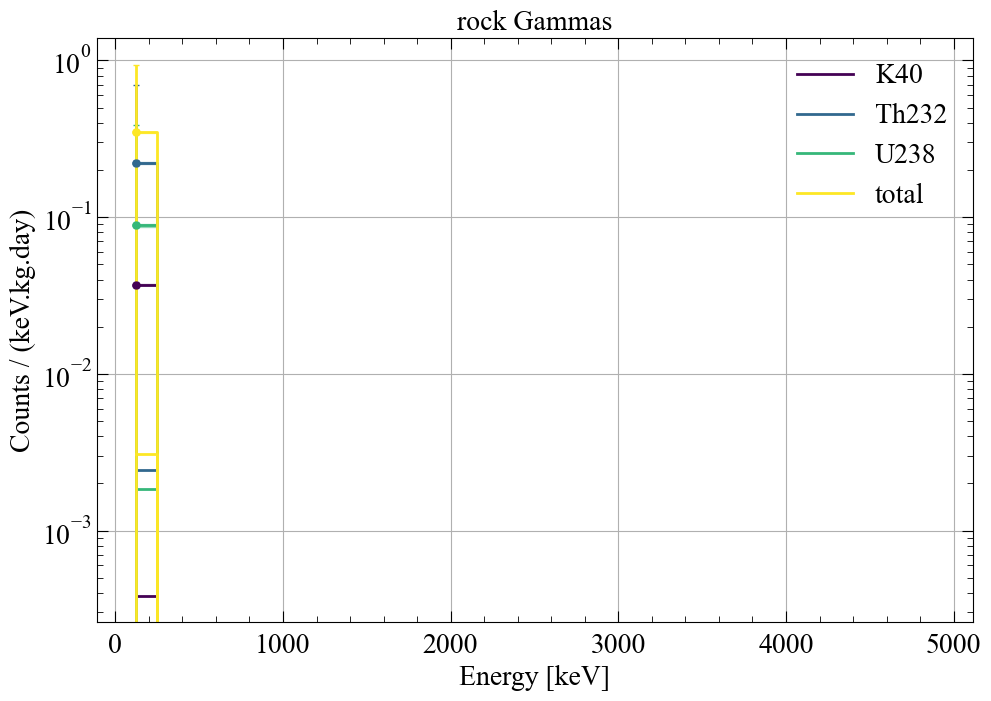

Error in plotting spectrum: x and y must have same first dimension, but have shapes (20,) and (1,)
Generating total spectrum plot...
Error in plotting spectrum totals: x and y must have same first dimension, but have shapes (20,) and (1,)

Simulation Summary
Shielding Type: Rock 

Total counts per Layer of Shielding:
____________________________________

Gammas: R = 3.48e-01 ± 3.09e-03 counts/keV.day.kg
Neutrons: R = 0.00e+00 ± 0.00e+00 counts/keV.day.kg

Total Counts:
_______________

R = 3.48e-01 ± 3.09e-03 counts/keV.day.kg


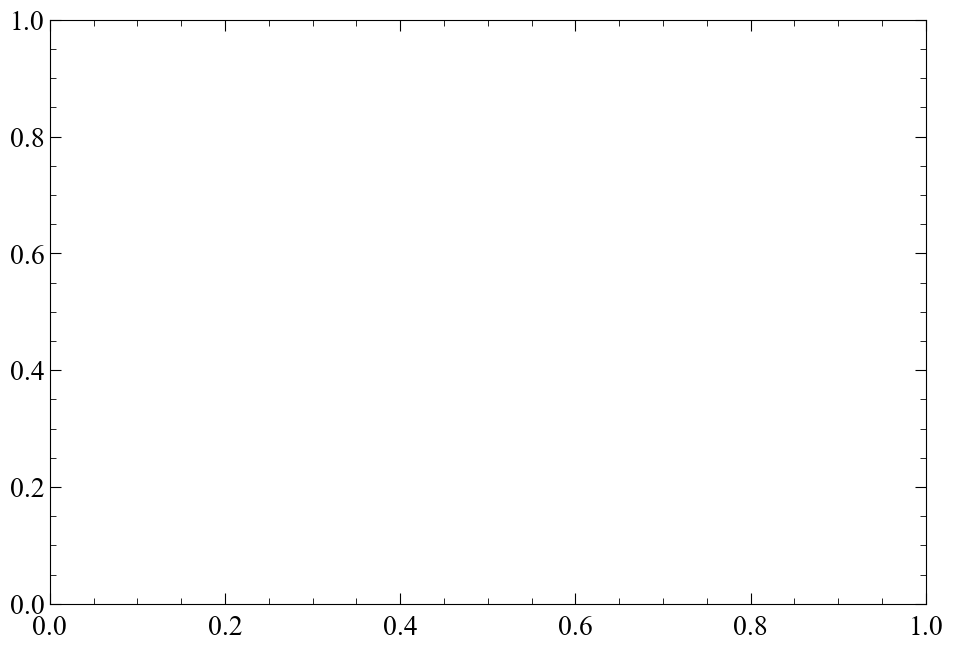

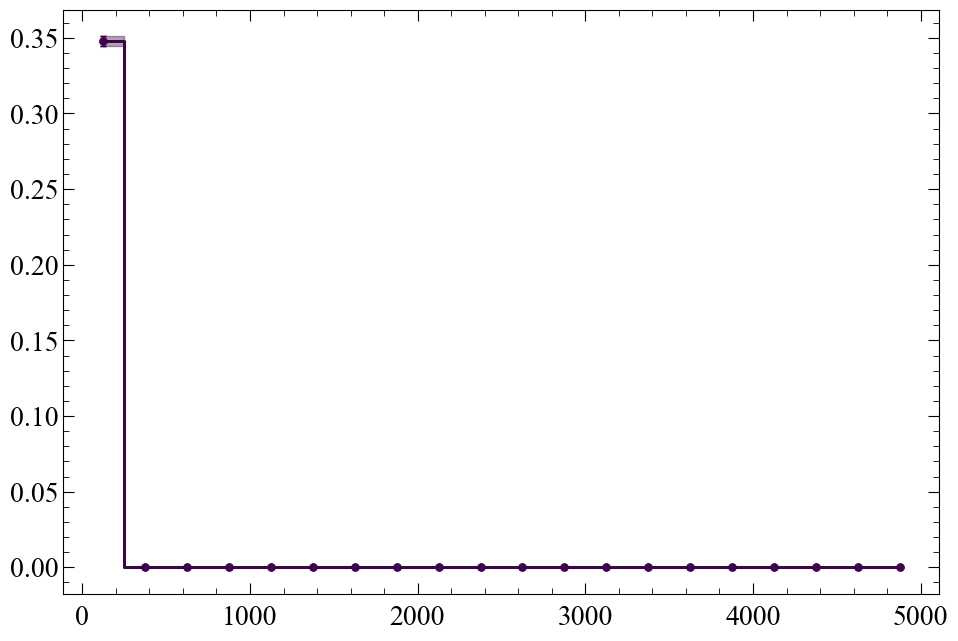

In [7]:
s = ssp.g4_sim_proc('rock',"/disk/data1/lze/ljuign/run3_g4sim_v11/v11-biasing/rock/filtered", plots = True)

In [10]:
s.energy['Cu']['K40']

array([ 125.,  375.,  625.,  875., 1125., 1375., 1625., 1875., 2125.,
       2375., 2625., 2875., 3125., 3375., 3625., 3875., 4125., 4375.,
       4625., 4875.])

In [13]:
s.counts_err['total']

array([6.39492935e+02, 4.08305009e+00, 6.44327916e-02, 1.24891898e-03,
       1.26467853e-03, 1.36833531e-03, 1.35780400e-03, 1.40760704e-03,
       1.46443358e-03, 1.60234382e-03, 2.37964970e-03, 4.17037990e-03,
       4.69839488e-03, 3.31722241e-03, 1.67272253e-03, 3.42530684e-04,
       9.54241699e-06, 6.32866658e-07, 0.00000000e+00, 0.00000000e+00])